In [1]:
from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json

url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest' 
#Original Sandbox Environment: 'https://sandbox-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
parameters = {
  'start':'1',
  'limit':'15',
  'convert':'USD'
}
headers = {
  'Accepts': 'application/json',
  'X-CMC_PRO_API_KEY': '0ad53085-1cb2-4eb8-ad9e-3ffbd7e56509',
}

session = Session()
session.headers.update(headers)

try:
  response = session.get(url, params=parameters)
  data = json.loads(response.text)
  #print(data)
except (ConnectionError, Timeout, TooManyRedirects) as e:
  print(e)

#NOTE:
# I had to go in and put "jupyter notebook --NotebookApp.iopub_data_rate_limit=1e10"
# Into the Anaconda Prompt to change this to allow to pull data

# If that didn't work try using the local host URL as shown in the video: https://www.youtube.com/watch?v=2HfSFdPEFRg&t=0s

In [3]:
type(data)

dict

In [5]:
import pandas as pd


#This allows you to see all the columns, not just like 15
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [7]:
#This normalizes the data and makes it all pretty in a dataframe

df = pd.json_normalize(data['data'])
df['timestamp'] = pd.to_datetime('now')
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,11631,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",2.100000e+07,1.973759e+07,1.973759e+07,False,NaN,1,NaN,NaN,None,2024-08-09T12:35:00.000Z,60409.536325,4.307961e+10,9.9985,-0.091385,3.516702,-6.014166,4.148611,-12.994232,-0.570599,1.192338e+12,56.3943,1.268600e+12,None,2024-08-09T12:35:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-08-09 08:36:42.432890
1,1027,Ethereum,ETH,ethereum,9202,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,1.202632e+08,1.202632e+08,True,NaN,2,NaN,NaN,None,2024-08-09T12:34:00.000Z,2623.147191,2.297765e+10,3.3075,-0.026591,4.497455,-16.302787,-15.026316,-28.668511,-9.705686,3.154681e+11,14.9340,3.154681e+11,None,2024-08-09T12:34:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-08-09 08:36:42.432890
2,825,Tether USDt,USDT,tether,93868,2015-02-25T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, avalanch...",NaN,1.154047e+11,1.170681e+11,True,NaN,3,NaN,NaN,None,2024-08-09T12:34:00.000Z,1.000315,7.031412e+10,3.8060,-0.013526,0.013023,0.103130,0.024152,0.060708,0.071981,1.154410e+11,5.4626,1.171049e+11,None,2024-08-09T12:34:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2024-08-09 08:36:42.432890
3,1839,BNB,BNB,bnb,2206,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,1.459367e+08,1.459367e+08,False,NaN,4,NaN,NaN,None,2024-08-09T12:34:00.000Z,506.052462,1.742074e+09,-1.1999,0.037436,2.425909,-11.433423,-3.749764,-21.106384,-14.248759,7.385162e+10,3.4946,7.385162e+10,None,2024-08-09T12:34:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-08-09 08:36:42.432890
4,5426,Solana,SOL,solana,714,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,4.663383e+08,5.817954e+08,True,NaN,5,NaN,NaN,None,2024-08-09T12:34:00.000Z,154.998316,4.542471e+09,-11.7653,-0.451796,-0.739921,-5.514731,9.540177,-2.386656,7.137644,7.228165e+10,3.4217,9.017731e+10,None,2024-08-09T12:34:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-08-09 08:36:42.432890
5,3408,USDC,USDC,usd-coin,21447,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,3.442889e+10,3.442889e+10,False,NaN,6,NaN,NaN,None,2024-08-09T12:34:00.000Z,1.000112,8.109575e+09,-2.5116,0.003868,0.018389,0.018576,0.009269,0.011813,0.024823,3.443275e+10,1.6286,3.443275e+10,None,2024-08-09T12:34:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2024-08-09 08:36:42.432890
6,52,XRP,XRP,xrp,1363,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",1.000000e+11,5.610436e+10,9.998737e+10,False,NaN,7,NaN,NaN,None,2024-08-09T12:35:00.000Z,0.584384,2.624932e+09,-52.8229,0.012143,-5.192264,1.946323,33.615772,17.659188,16.023242,3.278647e+10,1.5514,5.843837e+10,None,2024-08-09T12:35:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-08-09 08:36:42.432890
7,11419,Toncoin,TON,toncoin,499,2021-08-26T13:40:22.000Z,"[pos, layer-1, ftx-bankruptcy-estate, dwf-labs...",NaN,2.518352e+09,5.110228e+09,True,NaN,8,3.414167e+09,2.196573e+10,None,2024-08-09T12:34:00.000Z,6.433702,7.759451e+08,-16.5068,-0.095080,4.082810,-2.914106,-11.987578,-9.140763,-4.008221,1.620233e+10,0.7663,3.287768e+10,None,2024-08-09T12:34:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-08-09 08:36:42.432890
8,74,Dogecoin,DOGE,dogecoin,1034,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange, me..

### Automating the process

In [15]:
def api_runner():
    global df
    url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest' 
    #Original Sandbox Environment: 'https://sandbox-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
    parameters = {
      'start':'1',
      'limit':'15',
      'convert':'USD'
    }
    headers = {
      'Accepts': 'application/json',
      'X-CMC_PRO_API_KEY': '0ad53085-1cb2-4eb8-ad9e-3ffbd7e56509',
    }

    session = Session()
    session.headers.update(headers)

    try:
      response = session.get(url, params=parameters)
      data = json.loads(response.text)
      #print(data)
    except (ConnectionError, Timeout, TooManyRedirects) as e:
      print(e)

    #df2 = pd.json_normalize(data['data'])
    #df2['timestamp'] = pd.to_datetime('now')
    #df_append = pd.DataFrame(df)
    #df = pd.concat([df2,df_append])
        #activate if you are not creating a csv
    
    df = pd.json_normalize(data['data'])
    df['timestamp'] = pd.to_datetime('now')
    df
    
    if not os.path.isfile(r"<insert file path>\API.csv"):
        df.to_csv(r"<insert file path>\API.csv", header='column_names')
    else:
        df.to_csv(r"<insert file path>\API.csv", mode='a', header=False)

#!!make sure to set the file path where to save the CSV file (API.csv) to be generated to work
        
#NOTE:
# I had to go in and put "jupyter notebook --NotebookApp.iopub_data_rate_limit=1e10"
# Into the Anaconda Prompt to change this to allow to pull data

# If that didn't work try using the local host URL as shown in the video: https://www.youtube.com/watch?v=2HfSFdPEFRg&t=0s

In [17]:
import os
from time import time
from time import sleep

for i in range(333):
    api_runner()
    print('API Runner completed')
    sleep(5) #sleep for 5 seconds
exit()

#there is only 333 runs per day in API

API Runner completed
API Runner completed
API Runner completed
API Runner completed
API Runner completed


KeyboardInterrupt: 

### Call the generated csv

In [20]:
df72 = pd.read_csv(r"<insert file path>\API.csv")
df72

#!!make sure to set the file path

,Unnamed: 0,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,0,1,Bitcoin,BTC,bitcoin,11631,2010-07-13T00:00:00.000Z,"['mineable', 'pow', 'sha-256', 'store-of-value...",2.100000e+07,1.973759e+07,1.973759e+07,False,NaN,1,NaN,NaN,NaN,2024-08-09T12:59:00.000Z,60587.178846,4.199662e+10,3.7509,-0.196282,4.532521,-6.429632,4.316224,-12.631412,-0.178689,1.195845e+12,56.5424,1.272331e+12,NaN,2024-08-09T12:59:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-08-09 09:00:45.220994
1,1,1027,Ethereum,ETH,ethereum,9202,2015-08-07T00:00:00.000Z,"['pos', 'smart-contracts', 'ethereum-ecosystem...",NaN,1.202632e+08,1.202632e+08,True,NaN,2,NaN,NaN,NaN,2024-08-09T12:58:00.000Z,2629.185562,2.232603e+10,-2.9967,-0.375618,5.898927,-16.495179,-15.246603,-28.489962,-9.341939,3.161943e+11,14.9663,3.161943e+11,NaN,2024-08-09T12:58:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-08-09 09:00:45.220994
2,2,825,Tether USDt,USDT,tether,93869,2015-02-25T00:00:00.000Z,"['stablecoin', 'asset-backed-stablecoin', 'ava...",NaN,1.154047e+11,1.170681e+11,True,NaN,3,NaN,NaN,NaN,2024-08-09T12:58:00.000Z,1.000459,6.829426e+10,-2.5556,0.025618,0.019467,0.124605,0.018091,0.059326,0.074095,1.154576e+11,5.4577,1.171218e+11,NaN,2024-08-09T12:58:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2024-08-09 09:00:45.220994
3,3,1839,BNB,BNB,bnb,2206,2017-07-25T00:00:00.000Z,"['marketplace', 'centralized-exchange', 'payme...",NaN,1.459367e+08,1.459367e+08,False,NaN,4,NaN,NaN,NaN,2024-08-09T12:58:00.000Z,507.486039,1.729894e+09,-3.2231,-0.026496,3.323001,-11.294990,-3.500369,-21.267326,-13.915078,7.406083e+10,3.5009,7.406083e+10,NaN,2024-08-09T12:58:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-08-09 09:00:45.220994
4,4,5426,Solana,SOL,solana,714,2020-04-10T00:00:00.000Z,"['pos', 'platform', 'solana-ecosystem', 'cms-h...",NaN,4.663383e+08,5.817954e+08,True,NaN,5,NaN,NaN,NaN,2024-08-09T12:58:00.000Z,155.410294,4.356769e+09,-18.7820,-0.938017,0.064152,-5.019072,9.812730,-2.036273,7.575116,7.247377e+10,3.4304,9.041700e+10,NaN,2024-08-09T12:58:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-08-09 09:00:45.220994
5,5,3408,USDC,USDC,usd-coin,21448,2018-10-08T00:00:00.000Z,"['medium-of-exchange', 'stablecoin', 'asset-ba...",NaN,3.442889e+10,3.442889e+10,False,NaN,6,NaN,NaN,NaN,2024-08-09T12:58:00.000Z,1.000069,7.822264e+09,-9.2735,0.013336,0.012266,0.009988,0.014279,-0.002573,0.004215,3.443126e+10,1.6280,3.443126e+10,NaN,2024-08-09T12:58:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2024-08-09 09:00:45.220994
6,6,52,XRP,XRP,xrp,1363,2013-08-04T00:00:00.000Z,"['medium-of-exchange', 'enterprise-solutions',...",1.000000e+11,5.610436e+10,9.998737e+10,False,NaN,7,NaN,NaN,NaN,2024-08-09T12:59:00.000Z,0.583411,2.600707e+09,-53.7807,-0.732108,-4.902538,2.001106,33.107811,17.431462,15.742124,3.273191e+10,1.5472,5.834111e+10,NaN,2024-08-09T12:59:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-08-09 09:00:45.220994
7,7,11419,Toncoin,TON,toncoin,500,2021-08-26T13:40:22.000Z,"['pos', 'layer-1', 'ftx-bankruptcy-estate', 'd...",NaN,2.518352e+09,5.110228e+09,True,NaN,8,3.414167e+09,2.206540e+10,NaN,2024-08-09T12:58:00.000Z,6.462896,7.610995e+08,-20.7401,0.881789,3.563902,-2.357635,-11.481150,-8.713746,-3.499296,1.627585e+10,0.7696,3.302687e+10,NaN,2024-08-09T12:58:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-08-09 09:00:45.220994
8,8,74,Dogecoin,DOGE,dogecoin,1034,2013-12-15T00:00:00.000Z,"['mineable', 'pow', 'scrypt', 'me

In [24]:
df72

,Unnamed: 0,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,0,1,Bitcoin,BTC,bitcoin,11631,2010-07-13T00:00:00.000Z,"['mineable', 'pow', 'sha-256', 'store-of-value...",2.100000e+07,1.973759e+07,1.973759e+07,False,NaN,1,NaN,NaN,NaN,2024-08-09T12:59:00.000Z,60587.178846,4.199662e+10,3.7509,-0.196282,4.532521,-6.429632,4.316224,-12.631412,-0.178689,1.195845e+12,56.5424,1.272331e+12,NaN,2024-08-09T12:59:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-08-09 09:00:45.220994
1,1,1027,Ethereum,ETH,ethereum,9202,2015-08-07T00:00:00.000Z,"['pos', 'smart-contracts', 'ethereum-ecosystem...",NaN,1.202632e+08,1.202632e+08,True,NaN,2,NaN,NaN,NaN,2024-08-09T12:58:00.000Z,2629.185562,2.232603e+10,-2.9967,-0.375618,5.898927,-16.495179,-15.246603,-28.489962,-9.341939,3.161943e+11,14.9663,3.161943e+11,NaN,2024-08-09T12:58:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-08-09 09:00:45.220994
2,2,825,Tether USDt,USDT,tether,93869,2015-02-25T00:00:00.000Z,"['stablecoin', 'asset-backed-stablecoin', 'ava...",NaN,1.154047e+11,1.170681e+11,True,NaN,3,NaN,NaN,NaN,2024-08-09T12:58:00.000Z,1.000459,6.829426e+10,-2.5556,0.025618,0.019467,0.124605,0.018091,0.059326,0.074095,1.154576e+11,5.4577,1.171218e+11,NaN,2024-08-09T12:58:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2024-08-09 09:00:45.220994
3,3,1839,BNB,BNB,bnb,2206,2017-07-25T00:00:00.000Z,"['marketplace', 'centralized-exchange', 'payme...",NaN,1.459367e+08,1.459367e+08,False,NaN,4,NaN,NaN,NaN,2024-08-09T12:58:00.000Z,507.486039,1.729894e+09,-3.2231,-0.026496,3.323001,-11.294990,-3.500369,-21.267326,-13.915078,7.406083e+10,3.5009,7.406083e+10,NaN,2024-08-09T12:58:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-08-09 09:00:45.220994
4,4,5426,Solana,SOL,solana,714,2020-04-10T00:00:00.000Z,"['pos', 'platform', 'solana-ecosystem', 'cms-h...",NaN,4.663383e+08,5.817954e+08,True,NaN,5,NaN,NaN,NaN,2024-08-09T12:58:00.000Z,155.410294,4.356769e+09,-18.7820,-0.938017,0.064152,-5.019072,9.812730,-2.036273,7.575116,7.247377e+10,3.4304,9.041700e+10,NaN,2024-08-09T12:58:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-08-09 09:00:45.220994
5,5,3408,USDC,USDC,usd-coin,21448,2018-10-08T00:00:00.000Z,"['medium-of-exchange', 'stablecoin', 'asset-ba...",NaN,3.442889e+10,3.442889e+10,False,NaN,6,NaN,NaN,NaN,2024-08-09T12:58:00.000Z,1.000069,7.822264e+09,-9.2735,0.013336,0.012266,0.009988,0.014279,-0.002573,0.004215,3.443126e+10,1.6280,3.443126e+10,NaN,2024-08-09T12:58:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2024-08-09 09:00:45.220994
6,6,52,XRP,XRP,xrp,1363,2013-08-04T00:00:00.000Z,"['medium-of-exchange', 'enterprise-solutions',...",1.000000e+11,5.610436e+10,9.998737e+10,False,NaN,7,NaN,NaN,NaN,2024-08-09T12:59:00.000Z,0.583411,2.600707e+09,-53.7807,-0.732108,-4.902538,2.001106,33.107811,17.431462,15.742124,3.273191e+10,1.5472,5.834111e+10,NaN,2024-08-09T12:59:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-08-09 09:00:45.220994
7,7,11419,Toncoin,TON,toncoin,500,2021-08-26T13:40:22.000Z,"['pos', 'layer-1', 'ftx-bankruptcy-estate', 'd...",NaN,2.518352e+09,5.110228e+09,True,NaN,8,3.414167e+09,2.206540e+10,NaN,2024-08-09T12:58:00.000Z,6.462896,7.610995e+08,-20.7401,0.881789,3.563902,-2.357635,-11.481150,-8.713746,-3.499296,1.627585e+10,0.7696,3.302687e+10,NaN,2024-08-09T12:58:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-08-09 09:00:45.220994
8,8,74,Dogecoin,DOGE,dogecoin,1034,2013-12-15T00:00:00.000Z,"['mineable', 'pow', 'scrypt', 'me

### Converting scientific notation

In [26]:
pd.set_option('display.float_format', lambda x: '%.5f' % x)

In [28]:
df72

,Unnamed: 0,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,0,1,Bitcoin,BTC,bitcoin,11631,2010-07-13T00:00:00.000Z,"['mineable', 'pow', 'sha-256', 'store-of-value...",21000000.00000,19737587.00000,19737587.00000,False,NaN,1,NaN,NaN,NaN,2024-08-09T12:59:00.000Z,60587.17885,41996617555.11379,3.75090,-0.19628,4.53252,-6.42963,4.31622,-12.63141,-0.17869,1195844713549.35938,56.54240,1272330755757.36011,NaN,2024-08-09T12:59:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-08-09 09:00:45.220994
1,1,1027,Ethereum,ETH,ethereum,9202,2015-08-07T00:00:00.000Z,"['pos', 'smart-contracts', 'ethereum-ecosystem...",NaN,120263205.46332,120263205.46332,True,NaN,2,NaN,NaN,NaN,2024-08-09T12:58:00.000Z,2629.18556,22326029501.59245,-2.99670,-0.37562,5.89893,-16.49518,-15.24660,-28.48996,-9.34194,316194283463.95441,14.96630,316194283463.95001,NaN,2024-08-09T12:58:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-08-09 09:00:45.220994
2,2,825,Tether USDt,USDT,tether,93869,2015-02-25T00:00:00.000Z,"['stablecoin', 'asset-backed-stablecoin', 'ava...",NaN,115404652458.26874,117068077122.62410,True,NaN,3,NaN,NaN,NaN,2024-08-09T12:58:00.000Z,1.00046,68294263689.00511,-2.55560,0.02562,0.01947,0.12461,0.01809,0.05933,0.07409,115457587503.50308,5.45770,117121775165.35001,NaN,2024-08-09T12:58:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2024-08-09 09:00:45.220994
3,3,1839,BNB,BNB,bnb,2206,2017-07-25T00:00:00.000Z,"['marketplace', 'centralized-exchange', 'payme...",NaN,145936682.76708,145936682.76708,False,NaN,4,NaN,NaN,NaN,2024-08-09T12:58:00.000Z,507.48604,1729893841.24303,-3.22310,-0.02650,3.32300,-11.29499,-3.50037,-21.26733,-13.91508,74060829083.85124,3.50090,74060829083.85001,NaN,2024-08-09T12:58:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-08-09 09:00:45.220994
4,4,5426,Solana,SOL,solana,714,2020-04-10T00:00:00.000Z,"['pos', 'platform', 'solana-ecosystem', 'cms-h...",NaN,466338298.69852,581795426.31790,True,NaN,5,NaN,NaN,NaN,2024-08-09T12:58:00.000Z,155.41029,4356769222.95923,-18.78200,-0.93802,0.06415,-5.01907,9.81273,-2.03627,7.57512,72473772210.77631,3.43040,90416998384.89000,NaN,2024-08-09T12:58:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-08-09 09:00:45.220994
5,5,3408,USDC,USDC,usd-coin,21448,2018-10-08T00:00:00.000Z,"['medium-of-exchange', 'stablecoin', 'asset-ba...",NaN,34428894250.94929,34428894250.94929,False,NaN,6,NaN,NaN,NaN,2024-08-09T12:58:00.000Z,1.00007,7822264238.02403,-9.27350,0.01334,0.01227,0.00999,0.01428,-0.00257,0.00422,34431263745.21451,1.62800,34431263745.21000,NaN,2024-08-09T12:58:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2024-08-09 09:00:45.220994
6,6,52,XRP,XRP,xrp,1363,2013-08-04T00:00:00.000Z,"['medium-of-exchange', 'enterprise-solutions',...",100000000000.00000,56104361423.00000,99987365591.00000,False,NaN,7,NaN,NaN,NaN,2024-08-09T12:59:00.000Z,0.58341,2600706536.71772,-53.78070,-0.73211,-4.90254,2.00111,33.10781,17.43146,15.74212,32731907157.54463,1.54720,58341109901.89000,NaN,2024-08-09T12:59:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-08-09 09:00:45.220994
7,7,11419,Toncoin,TON,toncoin,500,2021-08-26T13:40:22.000Z,"['pos', 'layer-1', 'ftx-bankruptcy-estate', 'd...",NaN,2518352424.73759,5110227650.86780,True,NaN,8,3414166606.00000,22065404898.44968,NaN,2024-08-09T12:58:00.000Z,6.46290,761099467.08540,-20.74010,0.88179,3.56390,-2.35764,-11.48115,-8.71375,-3.49930,16275850695.50277,0.76960,33026871635.82000,N

### Grouping

In [34]:
df3 = df72.groupby('name', sort=False)[['quote.USD.percent_change_1h','quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d']].mean()
df3

,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d
name,,,,,,
Bitcoin,-0.19628,4.53252,-6.42963,4.31622,-12.63141,-0.17869
Ethereum,-0.37562,5.89893,-16.49518,-15.24660,-28.48996,-9.34194
Tether USDt,0.02562,0.01947,0.12461,0.01809,0.05933,0.07409
BNB,-0.02650,3.32300,-11.29499,-3.50037,-21.26733,-13.91508
Solana,-0.93802,0.06415,-5.01907,9.81273,-2.03627,7.57512
USDC,0.01334,0.01227,0.00999,0.01428,-0.00257,0.00422
XRP,-0.73211,-4.90254,2.00111,33.10781,17.43146,15.74212
Toncoin,0.88179,3.56390,-2.35764,-11.48115,-8.71375,-3.49930
Dogecoin,-0.35981,2.86201,-11.25512,-4.39094,-27.93262,-27.46310


### Stacking

In [37]:
df4 = df3.stack()
df4

name                                      
Bitcoin       quote.USD.percent_change_1h     -0.19628
              quote.USD.percent_change_24h     4.53252
              quote.USD.percent_change_7d     -6.42963
              quote.USD.percent_change_30d     4.31622
              quote.USD.percent_change_60d   -12.63141
              quote.USD.percent_change_90d    -0.17869
Ethereum      quote.USD.percent_change_1h     -0.37562
              quote.USD.percent_change_24h     5.89893
              quote.USD.percent_change_7d    -16.49518
              quote.USD.percent_change_30d   -15.24660
              quote.USD.percent_change_60d   -28.48996
              quote.USD.percent_change_90d    -9.34194
Tether USDt   quote.USD.percent_change_1h      0.02562
              quote.USD.percent_change_24h     0.01947
              quote.USD.percent_change_7d      0.12461
              quote.USD.percent_change_30d     0.01809
              quote.USD.percent_change_60d     0.05933
              quote.US

In [39]:
type(df3)

pandas.core.frame.DataFrame

### Converting to df

In [41]:
type(df4)

pandas.core.series.Series

In [43]:
df5 = df4.to_frame(name='values')
df5

values
name                                               
Bitcoin      quote.USD.percent_change_1h   -0.19628
             quote.USD.percent_change_24h   4.53252
             quote.USD.percent_change_7d   -6.42963
             quote.USD.percent_change_30d   4.31622
             quote.USD.percent_change_60d -12.63141
             quote.USD.percent_change_90d  -0.17869
Ethereum     quote.USD.percent_change_1h   -0.37562
             quote.USD.percent_change_24h   5.89893
             quote.USD.percent_change_7d  -16.49518
             quote.USD.percent_change_30d -15.24660
             quote.USD.percent_change_60d -28.48996
             quote.USD.percent_change_90d  -9.34194
Tether USDt  quote.USD.percent_change_1h    0.02562
             quote.USD.percent_change_24h   0.01947
             quote.USD.percent_change_7d    0.12461
             quote.USD.percent_change_30d   0.01809
             quote.USD.percent_change_60d   0.05933
             quote.USD.percent_change_90d   0.07409
BNB          quote.USD.percent_change_1h   -0.02650
             quote.USD.percent_change_24h   3.32300
             quote.USD.percent_change_7d  -11.29499
             quote.USD.percent_change_30d  -3.50037
             quote.USD.percent_change_60d -21.26733
             quote.USD.percent_change_90d -13.91508
Solana       quote.USD.percent_change_1h   -0.93802
             quote.USD.percent_change_24h   0.06415
             quote.USD.percent_change_7d   -5.01907
             quote.USD.percent_change_30d   9.81273
             quote.USD.percent_change_60d  -2.03627
             quote.USD.percent_change_90d   7.57512
USDC         quote.USD.percent_change_1h    0.01334
             quote.USD.percent_change_24h   0.01227
             quote.USD.percent_change_7d    0.00999
             quote.USD.percent_change_30d   0.01428
             quote.USD.percent_change_60d  -0.00257
             quote.USD.percent_change_90d   0.00422
XRP          quote.USD.percent_change_1h   -0.73211
             quote.USD.percent_change_24h  -4.90254
             quote.USD.percent_change_7d    2.00111
             quote.USD.percent_change_30d  33.10781
             quote.USD.percent_change_60d  17.43146
             quote.USD.percent_change_90d  15.74212
Toncoin      quote.USD.percent_change_1h    0.88179
             quote.USD.percent_change_24h   3.56390
             quote.USD.percent_change_7d   -2.35764
             quote.USD.percent_change_30d -11.48115
             quote.USD.percent_change_60d  -8.71375
             quote.USD.percent_change_90d  -3.49930
Dogecoin     quote.USD.percent_change_1h   -0.35981
             quote.USD.percent_change_24h   2.86201
             quote.USD.percent_change_7d  -11.25512
             quote.USD.percent_change_30d  -4.39094
             quote.USD.percent_change_60d -27.93262
             quote.USD.percent_change_90d -27.46310
Cardano      quote.USD.percent_change_1h   -0.28128
             quote.USD.percent_change_24h   2.15432
             quote.USD.percent_change_7d  -10.52920
             quote.USD.percent_change_30d -10.87819
             quote.USD.percent_change_60d -23.18570
             quote.USD.percent_change_90d -22.87696
TRON         quote.USD.percent_change_1h    0.02011
             quote.USD.percent_change_24h   1.14497
             quote.USD.percent_change_7d    0.82998
             quote.USD.percent_change_30d  -2.42189
             quote.USD.percent_change_60d   9.09260
             quote.USD.percent_change_90d   0.47741
Avalanche    quote.USD.percent_change_1h   -0.16729
             quote.USD.percent_change_24h   4.44763
             quote.USD.percent_change_7d  -12.73274
             quote.USD.percent_change_30d -18.50886
             quote.USD.percent_change_60d -33.28127
             quote.USD.percent_change_90d -34.98878
Shiba Inu    quote.USD.percent_change_1h   -0.44039
             quote.USD.percent_change_24h   3.73749
             quote.USD.percent_change_7d  -10.25517
             quote.USD.percent_change_30d

### Creating an index

In [51]:
df5.count()

#determines the number of rows

values    90
dtype: int64

In [53]:
index = pd.Index(range(90))

df6 = df5.set_index(index)
df6

,values
0,-0.19628
1,4.53252
2,-6.42963
3,4.31622
4,-12.63141
5,-0.17869
6,-0.37562
7,5.89893
8,-16.49518
9,-15.24660


In [55]:
df6 = df5.reset_index()
df6

,name,level_1,values
0,Bitcoin,quote.USD.percent_change_1h,-0.19628
1,Bitcoin,quote.USD.percent_change_24h,4.53252
2,Bitcoin,quote.USD.percent_change_7d,-6.42963
3,Bitcoin,quote.USD.percent_change_30d,4.31622
4,Bitcoin,quote.USD.percent_change_60d,-12.63141
5,Bitcoin,quote.USD.percent_change_90d,-0.17869
6,Ethereum,quote.USD.percent_change_1h,-0.37562
7,Ethereum,quote.USD.percent_change_24h,5.89893
8,Ethereum,quote.USD.percent_change_7d,-16.49518
9,Ethereum,quote.USD.percent_change_30d,-15.24660


### Rename column

In [58]:
df7 = df6.rename(columns={'level_1': 'percent_change'})
df7

,name,percent_change,values
0,Bitcoin,quote.USD.percent_change_1h,-0.19628
1,Bitcoin,quote.USD.percent_change_24h,4.53252
2,Bitcoin,quote.USD.percent_change_7d,-6.42963
3,Bitcoin,quote.USD.percent_change_30d,4.31622
4,Bitcoin,quote.USD.percent_change_60d,-12.63141
5,Bitcoin,quote.USD.percent_change_90d,-0.17869
6,Ethereum,quote.USD.percent_change_1h,-0.37562
7,Ethereum,quote.USD.percent_change_24h,5.89893
8,Ethereum,quote.USD.percent_change_7d,-16.49518
9,Ethereum,quote.USD.percent_change_30d,-15.24660


### Updare percent_change data names

In [68]:
df7['percent_change'] = df7['percent_change'].replace(['quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d'],['24h','7d','30d','60d','90d'])
df7

,name,percent_change,values
0,Bitcoin,1h,-0.19628
1,Bitcoin,24h,4.53252
2,Bitcoin,7d,-6.42963
3,Bitcoin,30d,4.31622
4,Bitcoin,60d,-12.63141
5,Bitcoin,90d,-0.17869
6,Ethereum,1h,-0.37562
7,Ethereum,24h,5.89893
8,Ethereum,7d,-16.49518
9,Ethereum,30d,-15.24660


### Visualization

In [61]:
import seaborn as sns
import matplotlib.pyplot as plt

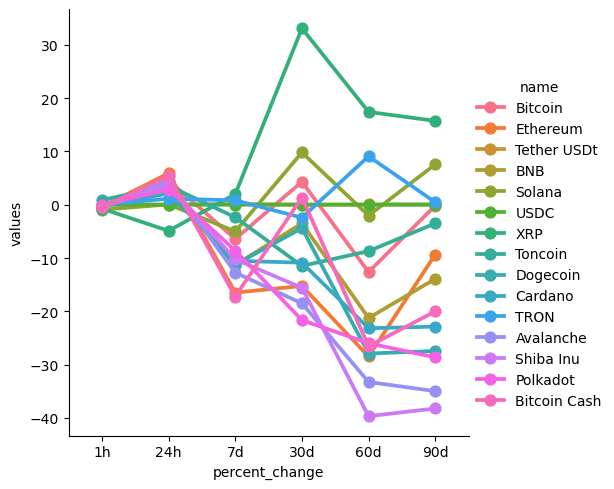

In [70]:
sns.catplot(x='percent_change', y='values', hue='name', data=df7, kind='point')

### Looking at specific name

In [76]:
df10 = df72[['name','quote.USD.price','timestamp']]
df10

,name,quote.USD.price,timestamp
0,Bitcoin,60587.17885,2024-08-09 09:00:45.220994
1,Ethereum,2629.18556,2024-08-09 09:00:45.220994
2,Tether USDt,1.00046,2024-08-09 09:00:45.220994
3,BNB,507.48604,2024-08-09 09:00:45.220994
4,Solana,155.41029,2024-08-09 09:00:45.220994
5,USDC,1.00007,2024-08-09 09:00:45.220994
6,XRP,0.58341,2024-08-09 09:00:45.220994
7,Toncoin,6.46290,2024-08-09 09:00:45.220994
8,Dogecoin,0.10417,2024-08-09 09:00:45.220994
9,Cardano,0.34175,2024-08-09 09:00:45.220994


In [78]:
df11 = df10.query("name =='Bitcoin'")
df11

,name,quote.USD.price,timestamp
0,Bitcoin,60587.17885,2024-08-09 09:00:45.220994
15,Bitcoin,60587.17885,2024-08-09 09:00:50.441286
30,Bitcoin,60587.17885,2024-08-09 09:00:55.640471
45,Bitcoin,60587.17885,2024-08-09 09:01:00.823040
60,Bitcoin,60587.17885,2024-08-09 09:01:06.036738


### Visualization

<Axes: xlabel='timestamp', ylabel='quote.USD.price'>

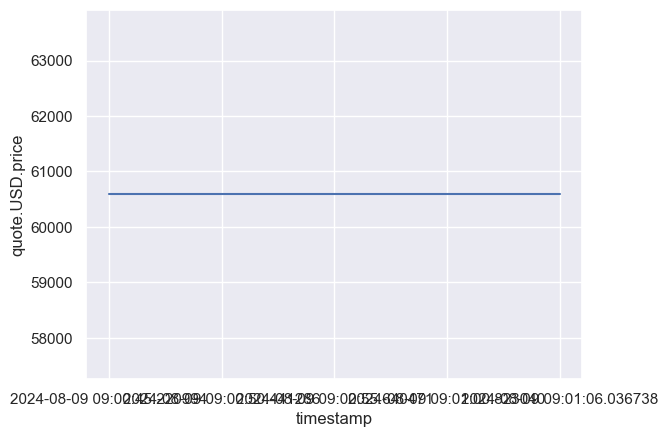

In [84]:
sns.set_theme(style='darkgrid')

sns.lineplot(x='timestamp', y='quote.USD.price', data=df11)